In [47]:
import numpy as np
import csv
import pandas as pd

In [48]:
data=pd.read_csv("2017-fordgobike-tripdata.csv")
print(data[:5])

   duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244        

f=open("2017-fordgobike-tripdata.csv","r")
print(all_ages.head(5),recent_grads.head(5))data=list(csv.reader(f))
header=data[0]
data=data[1:]
print(header)
print(data[:5])

In [54]:
start_station_count=dict()
station_unique=data["start_station_name"].unique()

def age(row):
    birthyear = row['member_birth_year']
    if pd.isnull(birthyear):
        return "Unknown"
    else:
        return 2018-int(birthyear)
age_list= data.apply(age, axis=1)

import matplotlib.pylab as plt
plt.plot(*zip(*sorted(age_list.items())))
Series.plot.bar(**kwds)
plt.show()




AttributeError: 'Series' object has no attribute 'items'

def column_unique(data, index):
    column_unique={}
    for row in data:
        if row[index] in column_unique:
            column_unique[row[index]]+=1
        else:
            column_unique[row[index]]=1
    return column_unique
bike_id_unique=column_unique(data,11)
print(len(bike_id_unique))
print(len(data))
gender_unique=column_unique(data,14)
print(gender_unique)
birthyear_unique=column_unique(data,13)
age_list={}
for i,k in birthyear_unique.iteritems():
    try:
        age = 2018-int(i)
    except:
        continue
    age_list[age]=k

import matplotlib.pylab as plt
plt.plot(*zip(*sorted(age_list.items())))
plt.show()


In [41]:
start_station=column_unique(data,4)
end_station=column_unique(data,8)
station_count={}
for i in start_station:
    station_count[i]=(start_station[i],end_station[i])
station_difference={}
for i in start_station:
    station_difference[i]=start_station[i]-end_station[i]
station_location=[]
for row in data:
    if row[4] not in station_location:
        station_location.append(row[5])
        station_location.append(row[6])
print(station_location)

KeyboardInterrupt: 

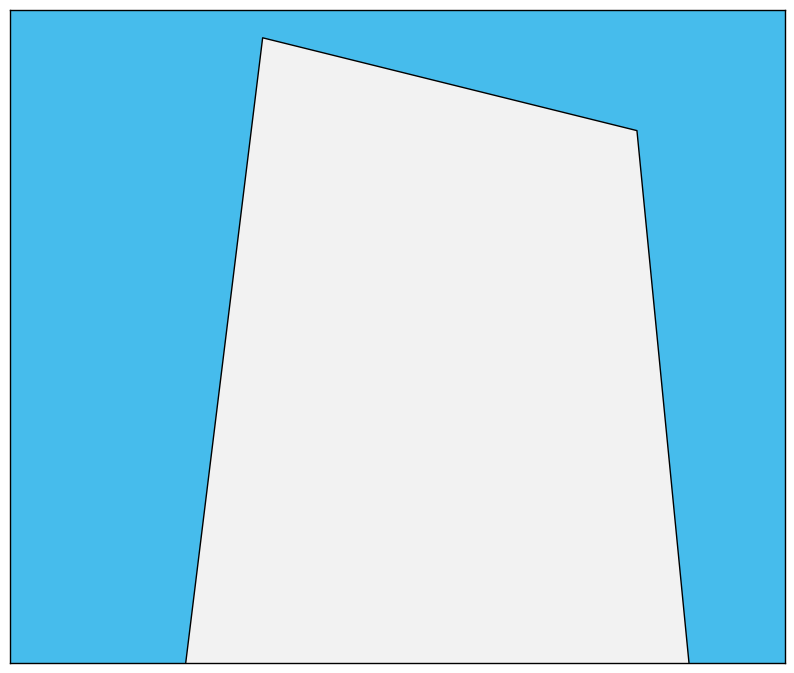

In [27]:
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

fig,ax=plt.subplots(figsize=(10,10))

m=Basemap(resolution='l', # c, l, i, h, f or None
            projection='merc',
            lat_0=37.76, lon_0=-122.44,
            llcrnrlon=-122.54, llcrnrlat= 37.689, urcrnrlon=-122.351, urcrnrlat=37.815)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
plt.show()


In [39]:
def plot_area(pos):
    count = station_difference[pos]
    x, y = m(station_location[pos][0], station_location[pos][1])
    size = (count/1000) ** 2 + 3
    m.plot(x, y, 'o', markersize=size, color='#444444', alpha=0.8)
    
station_difference.pos.apply(plot_area)


AttributeError: 'dict' object has no attribute 'pos'

In [57]:
def binary_array_to_number(arr):
    binary=0
    for i,j in enumerate(arr):
        value=2**(len(arr)-(i+1))*j
        binary=binary+value
    return binary
print(binary_array_to_number([1,1,1,1]))
 

15


In [103]:
def replace_zero(arr):
    length=0
    longest=0
    trigger=0
    ind=-1
    position=0
    for i,k in enumerate(arr):
        if k==1:
            length+=1
            if length>=longest:
                longest=length
                position=ind
            #print(length,longest,ind,position,trigger)        
        if k==0 and trigger==0:
            length+=1
            longest=length
            trigger=1
            ind=i
            position = i
            #print(length,longest,ind,position,trigger)   
        if k==0 and trigger==1:
            if length>=longest:
                longest=length
                position=ind
                #trigger=0
                ind=i
                length=i-ind
            else:
                length=i-ind
                #trigger=0
                ind=i
            #print(length,longest,ind,position,trigger)
    return position
print(replace_zero([1,1,1,0,1,1,0,1,1,1]))

#,1,0,1,1,1

6


In [100]:
def replace_zero(arr):
    length=0
    longest=0
    trigger=0
    ind=-1
    position=0
    for i,k in enumerate(arr):
        if k==1:
            length+=1
            if length>=longest:
                longest=length
                position=ind
            #print(length,longest,ind,position,trigger)        
        if k==0 and trigger==0:
            length+=1
            #longest=length
            trigger=1
            ind=i
            position=i
            #print(length,longest,ind,position,trigger)   
        if k==0 and trigger==1:
            if length>=longest:
                longest=length
                position=ind
            length=i-ind
            ind=i
            #print(length,longest,ind,position,trigger)
    return position
print(replace_zero([1,1,1,0,1,1,0,1,1,1]))

#,1,0,1,1,1

6


In [101]:
def replace_zero(arr):
    chain_length = 0
    longest_chain_length = 0
    is_first_zero = True
    last_zero_ind = None
    best_zero_ind =None
    for i, k in enumerate(arr):
        # If k is 1, increase chain_length, update longest length if applicable
        if k == 1:
            chain_length += 1
            if chain_length >= longest_chain_length:
                longest_chain_length = chain_length
                best_zero_ind = last_zero_ind
        else:
            assert k == 0
            if is_first_zero:
                is_first_zero = False
                chain_length += 1
                best_zero_ind = i
            else:
                if chain_length >= longest_chain_length:
                    longest_chain_length = chain_length
                    best_zero_ind = last_zero_ind
                chain_length = i - last_zero_ind
            last_zero_ind = i

        # else, k is 0,
        #    if first 0, keep increasing chain length
        #    else
        #      (at the beginning, chain_length=6;)
        #      update longest_chain_length and position to the last 0 if A.
        #      update chain_length to what begins with the last 0 (chain legnth 3)
    return best_zero_ind

print(replace_zero([1,1,1,0,1,1,0,1,1,1]))

#,1,0,1,1,1

6


In [ ]:
def replace_zero(arr):
    chain_length = 0
    longest_chain_length = 0
    is_first_zero = True
    last_zero_ind = None
    best_zero_ind =None
    for i, k in enumerate(arr):
        # If k is 1, increase chain_length, update longest length if applicable
        if k == 1:
            chain_length += 1
            if chain_length >= longest_chain_length:
                longest_chain_length = chain_length
                best_zero_ind = last_zero_ind
        else:
            assert k == 0
            if is_first_zero:
                is_first_zero = False
                chain_length += 1
                best_zero_ind = i
                longest_chain_length = chain_length
            else:
                if chain_length >= longest_chain_length:
                    longest_chain_length = chain_length
                    best_zero_ind = last_zero_ind
                chain_length = i - last_zero_ind
            last_zero_ind = i

        # else, k is 0,
        #    if first 0, keep increasing chain length
        #    else
        #      (at the beginning, chain_length=6;)
        #      update longest_chain_length and position to the last 0 if A.
        #      update chain_length to what begins with the last 0 (chain legnth 3)
    return best_zero_ind

print(replace_zero([1,1,1,0,1,1,0,1,1,1]))

#,1,0,1,1,1

In [ ]:
def replace_zero(arr):
    prev_chain = 0
    next_chain = 0
    longest_chain = -1
    best_pos = None
    for i, k in enumerate(arr):
        if k:
            next_chain += 1
        else:
            chain_len = prev_chain + next_chain
            if chain_len >= longest_chain:
                best_pos = i - next_chain - 1
                longest_chain = chain_len
            prev_chain = next_chain
            next_chain = 0
    
    chain_len = prev_chain + next_chain
    if chain_len >= longest_chain:
        best_pos = len(arr) - next_chain - 1
    return best_pos